## Voice Recognition Classification

In [184]:
import numpy as np
import pandas as pd
from io import StringIO

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.pipeline import make_pipeline
#from sklearn.metrics import plot_confusion_matrix 

from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

# KFold cross-validator
kfold = KFold(n_splits=5)

import warnings

## Exploratory Data Analysis

### Reading the Dataset

In [8]:
df = pd.read_csv("voice.csv")

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [9]:
df.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [11]:
df.shape

(3168, 21)

In [12]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


### Dataset Discription:
<li>The goal is to classify the gender based on the voice features</li>
<li>The dataset containts 21 columns including 20 attributes and 1 taregt values whcih is the gender</li>
<li>The Dimensions of the dataset are 3167x21</li>

## Data Wrangling & visualization

### Dataset Attributes:

<ol>
<li>meanfreq: mean frequency (in kHz)</li>
<li>sd: standard deviation of frequency</li>
<li>median: median frequency (in kHz)</li>
<li>Q25: first quantile (in kHz)</li>
<li>Q75: third quantile (in kHz)</li>
<li>IQR: interquantile range (in kHz)</li>
<li>skew: skewness</li>
<li>kurt: kurtosis</li>
<li>sp.ent: spectral entropy</li>
<li>sfm: spectral flatness</li>
<li>centroid: frequency centroid (see specprop)</li>
<li>peakf: peak frequency (frequency with highest energy)</li>
<li>meanfun: average of fundamental frequency measured across acoustic signal</li>
<li>minfun: minimum fundamental frequency measured across acoustic signal</li>
<li>maxfun: maximum fundamental frequency measured across acoustic signal</li>
<li>meandom: average of dominant frequency measured across acoustic signal</li>
<li>mindom: minimum of dominant frequency measured across acoustic signal</li>
<li>maxdom: maximum of dominant frequency measured across acoustic signal</li>
<li>dfrange: range of dominant frequency measured across acoustic signal</li>
<li>modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range </li>
<li>label: male or female</li></ol>

In [14]:
df.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

**As shown above all the features are numerical and the target value is an object.**

In [15]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

**There's no missing data in any of the features in the dataset**

now we need to convert the laberl column into numerical to be able to visualize the dataset

In [16]:
def check_out(col):
    q1, q3 = df[col].quantilee([0.25,0.75])
    iqr=q3-q1
    rang = 1.5*iqr
    return(q1-rang, q3+rang)

In [19]:
def plot(col):
    fig, axes = plt.subplots(1, 2)
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, ax=axes[1], color='#ff4125', kde=True)
    fig.set_size_inches(15, 5)

The outliers are in dots , first box edge is first quartile , median = the line inside the box, the right edge is the quartile 3 , the line at the right most end is the end whisker.

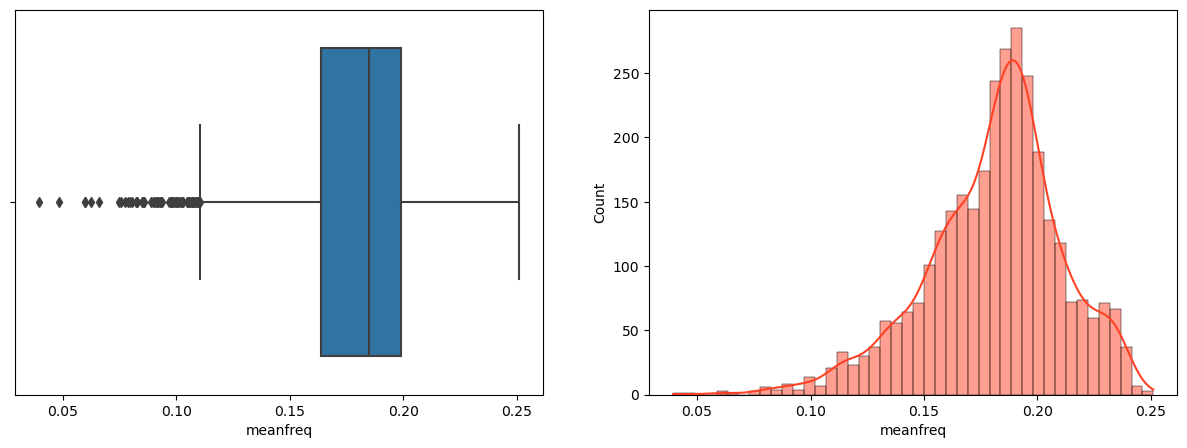

In [20]:
plot('meanfreq')

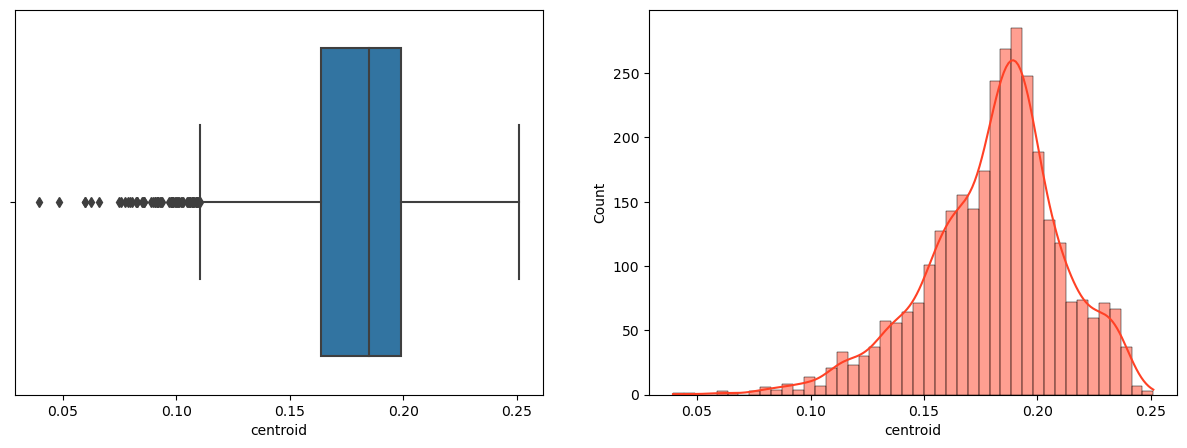

In [30]:
plot('centroid')

In [21]:
df["label"] = LabelEncoder().fit_transform(df["label"]) # 1 -> male , 0-> female

### Data Visualization

/Users/sarthakbharadwaj/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


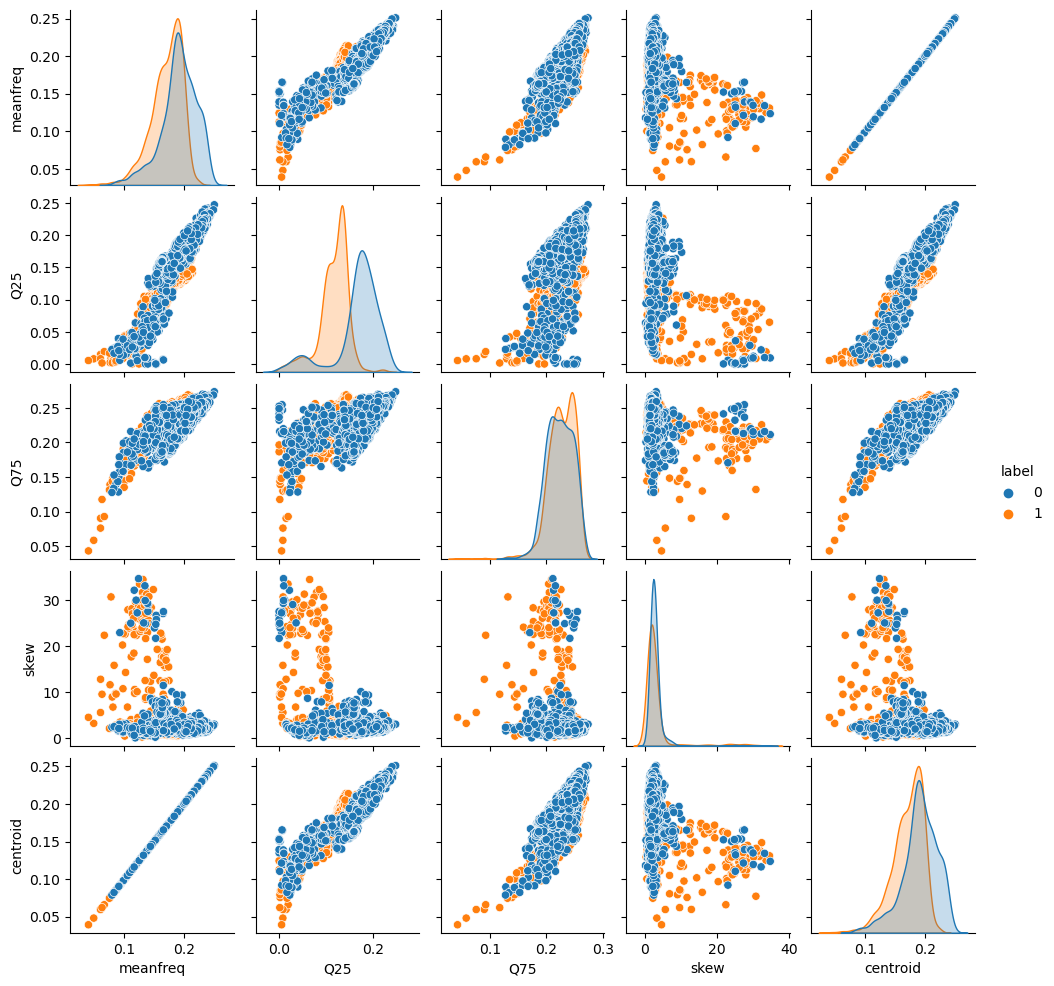

In [26]:
sns.pairplot(df[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], hue='label', height=2)

**This pairplot is plotted to show the relations between the dataset features and we find that the skewness with the quartiles are having a weak relation unlike the meanfreq with the centroid as they have a strong relation.**

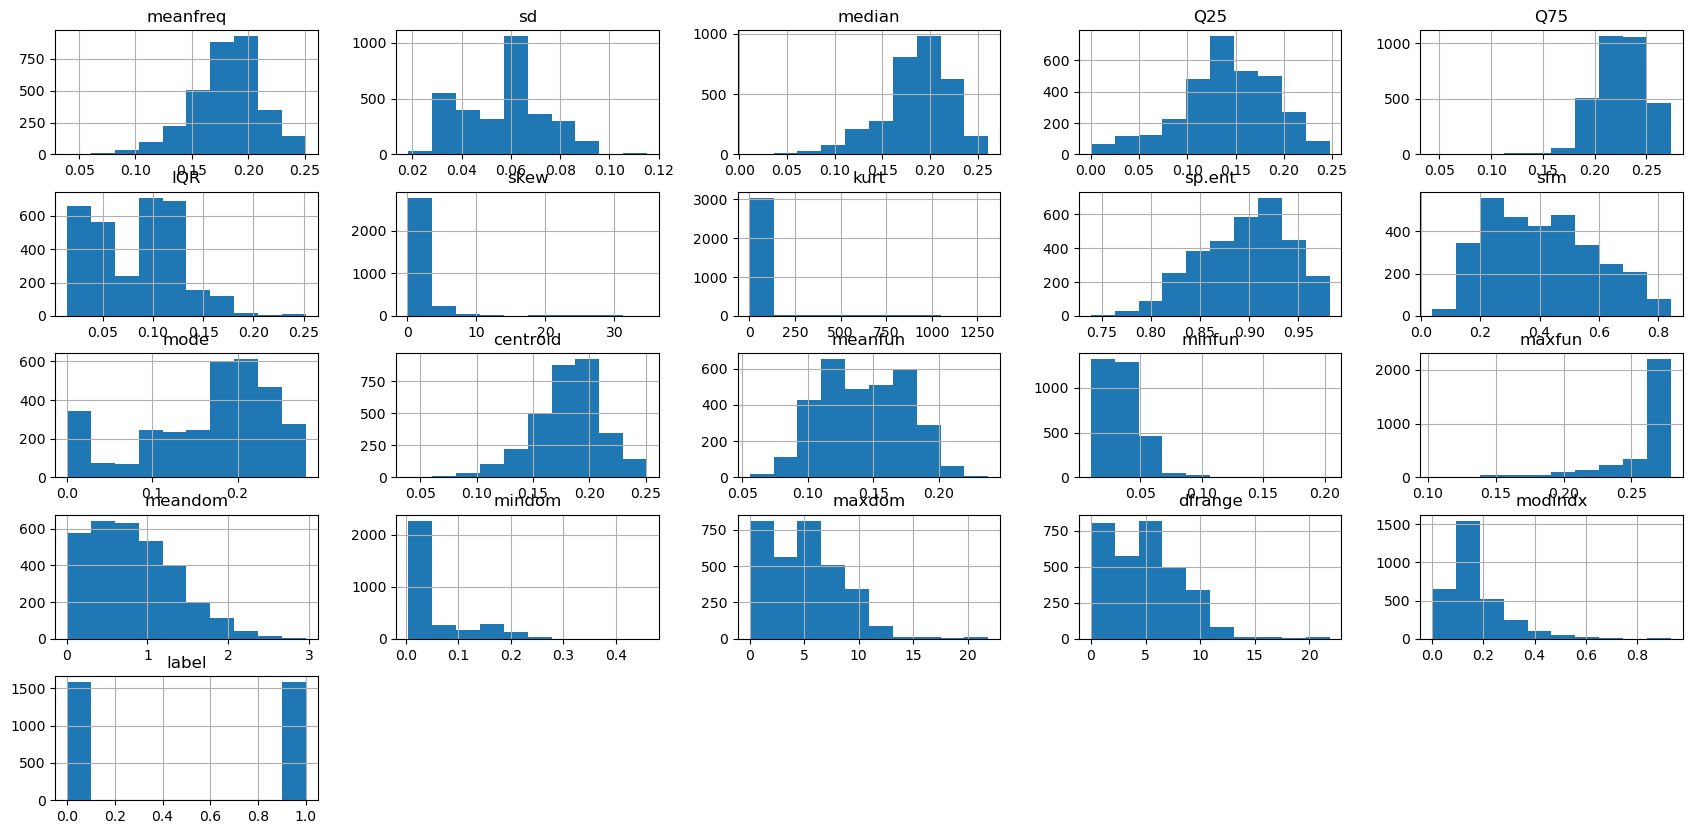

In [29]:
df.hist(figsize=(21, 10))
plt.show()

**The bar charts above to show if there is any outliers; and by looking at it we can se that the data does not contain alot of outliers and the highest features that contains outliers is the skewness  and kurt; also we can find that The Data is not biased as it is split evenly between the class (50% males, 50% females).**

<Axes: >

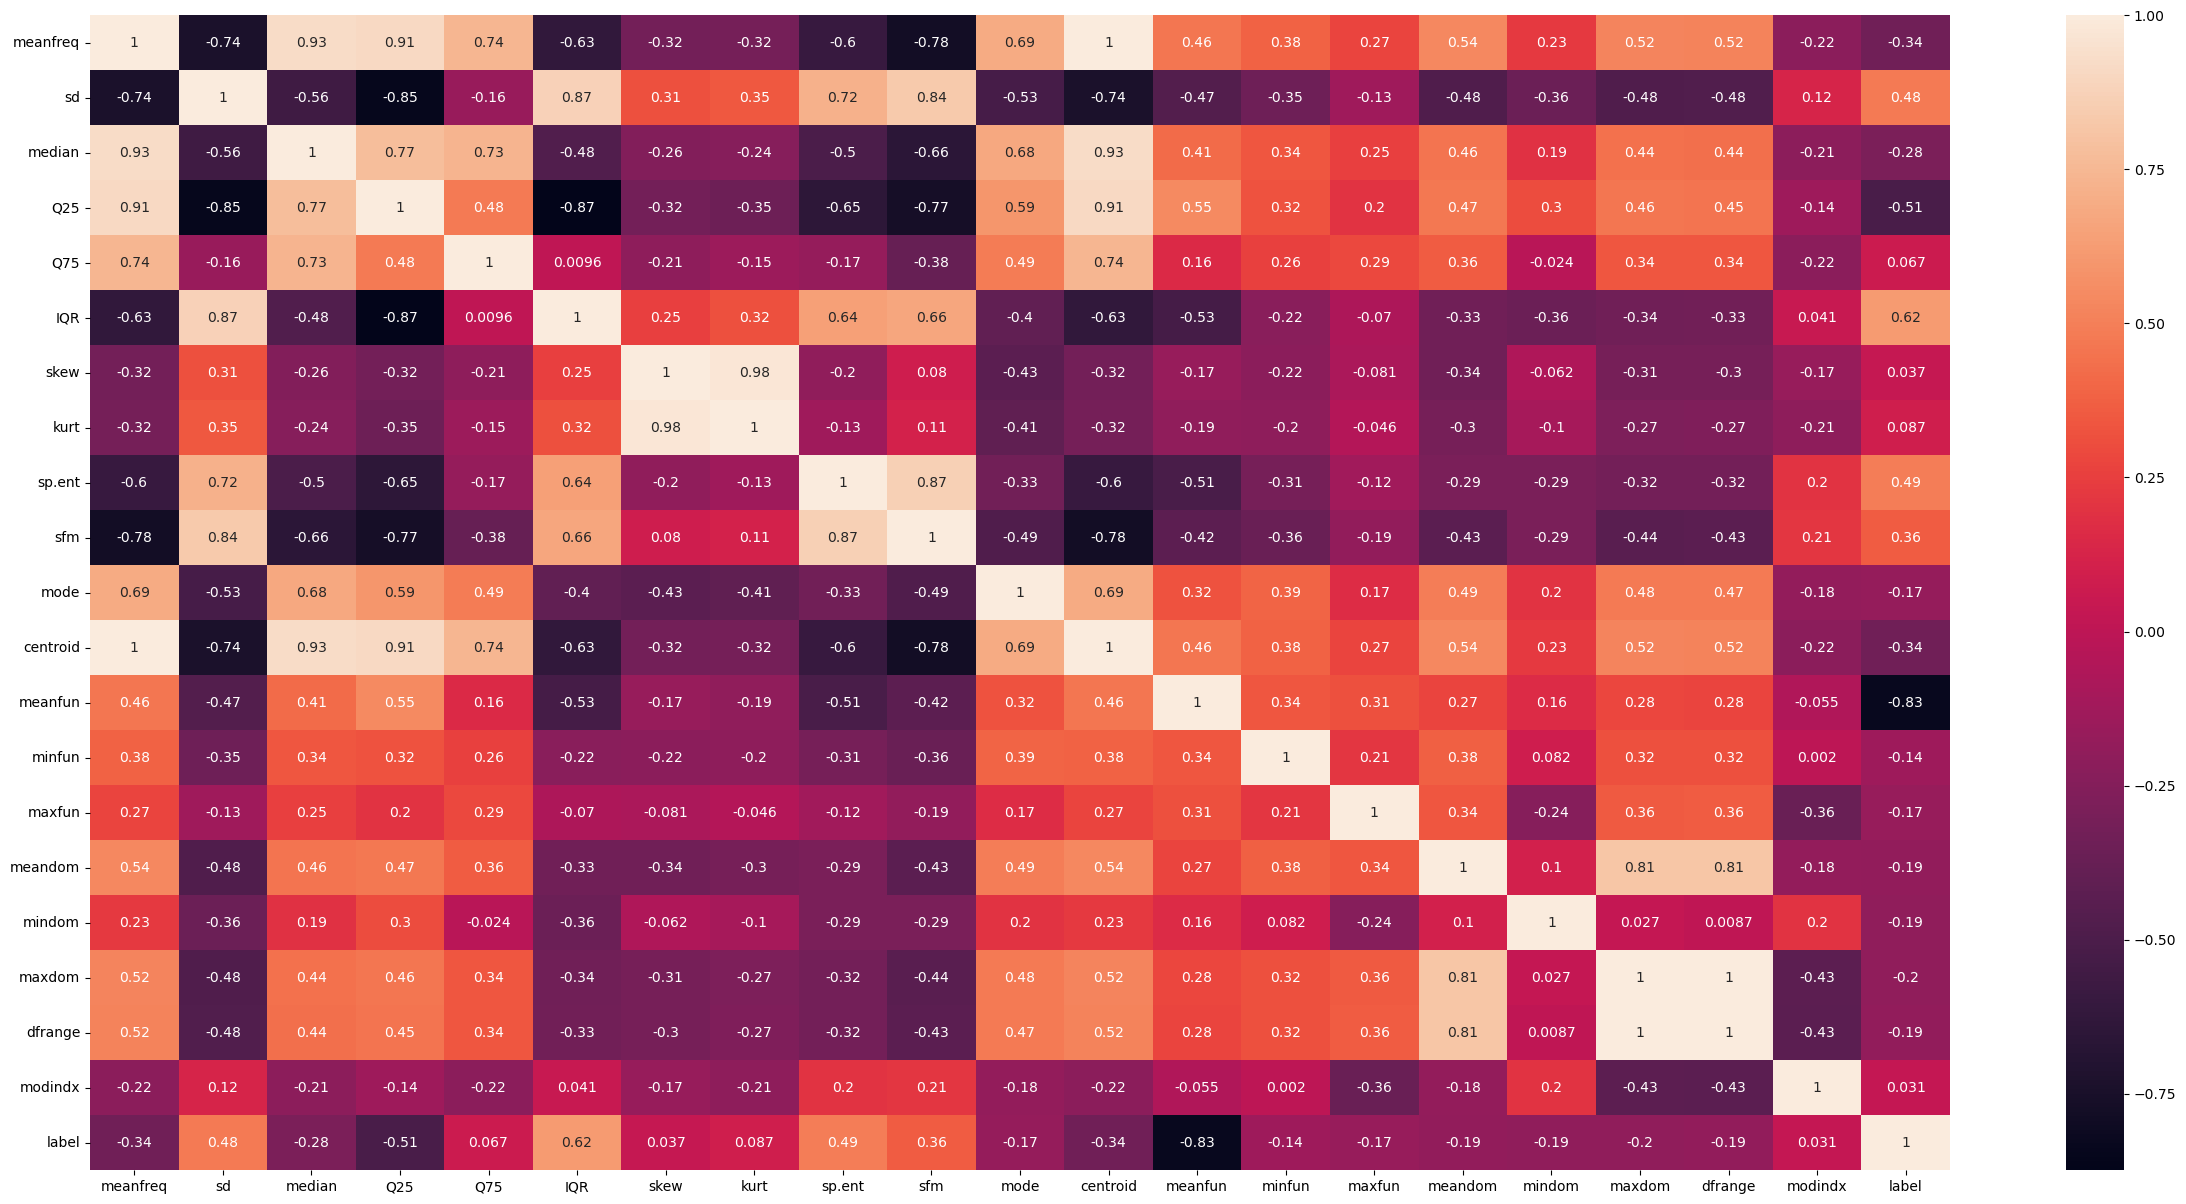

In [34]:
correlation = df.corr()
#print(correlation)

fig=plt.gcf()
fig.set_size_inches(30,15)
sns.heatmap(data=correlation, annot=True)

**This Heatmap shows the correlations between the features; and by looking at it we find a positive correlation between the label and IQR, label and sp.ent, and a huge negative correlation between the label and meanfun.**

## Data Preprocessing

**We first split the dataset into the feature, class**

In [80]:
gender_label = df.iloc[:, -1].to_numpy()
df1 = df.iloc[:, :-1]

**Then splitting them into train, validation sub-datasets**

In [81]:
voiceX_train, voiceX_test, voiceY_train, voiceY_test = train_test_split(df1, gender_label, test_size=0.25, random_state=42)

## Machine Learning Models

In [156]:
from sklearn.metrics import classification_report?

In [157]:
def plot_evaluation(y_true, y_pred, method="model"):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {method}')
    plt.show()

    # Classification Report
    report = classification_report(y_true, y_pred,digits=4)
    print('Classification Report:')
    print(report)


## Linear regression

In [158]:
model = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=1000))
model.fit(voiceX_train, voiceY_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [159]:
if voiceX_test.shape[1] == 1:
    voiceX_test = voiceX_test.reshape(-1, 1)

y_pred = model.predict(voiceX_test)
score = model.score(voiceX_test, voiceY_test)



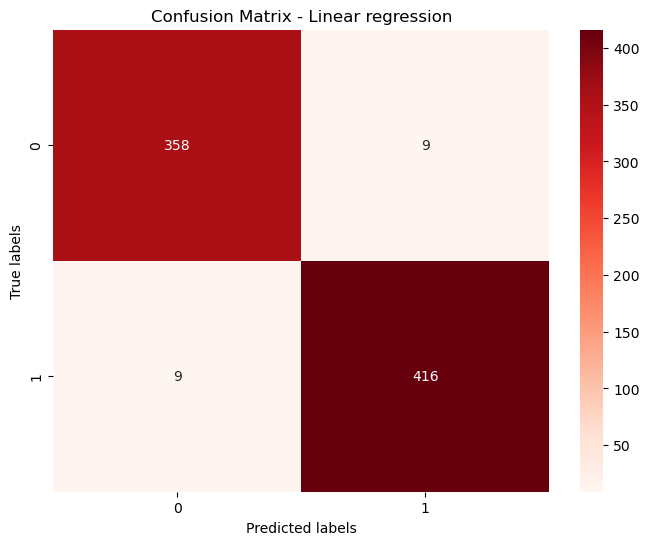

Classification Report:
              precision    recall  f1-score   support

           0     0.9755    0.9755    0.9755       367
           1     0.9788    0.9788    0.9788       425

    accuracy                         0.9773       792
   macro avg     0.9772    0.9772    0.9772       792
weighted avg     0.9773    0.9773    0.9773       792



In [160]:
plot_evaluation(voiceY_test, y_pred, method = "Linear regression")

### K-Nearest Neighbor

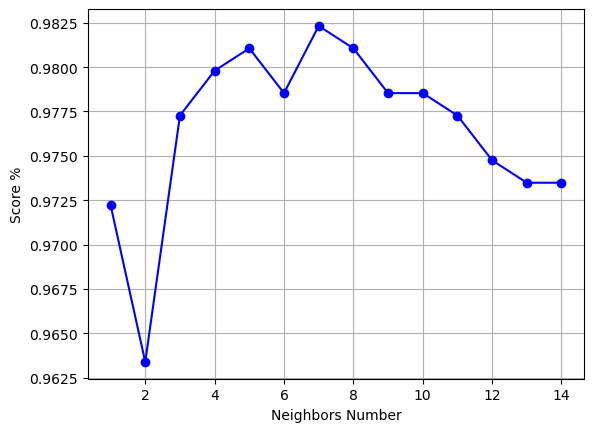

In [161]:
# KNN test run to determine the optimal n_neighbors
knn_valid_score_list=[]
n_neighbors_num = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

for i in range(1,15):
    test_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i))
    test_knn.fit(voiceX_train, voiceY_train)
    knn_valid_score_list.append(test_knn.score(voiceX_test, voiceY_test))
    
plt.plot(n_neighbors_num,  knn_valid_score_list, "b")
plt.plot(n_neighbors_num,  knn_valid_score_list, "bo")
plt.xlabel("Neighbors Number")
plt.ylabel("Score %")
plt.grid(True)
plt.show()

**After this test train for the KNN we found that the best n_neighbor = 7 as shown in the figure above, so we train with the optimal parameter** 

In [162]:
# Best Model Build
knn = KNeighborsClassifier(n_neighbors=7).fit(voiceX_train, voiceY_train)

# Model Prediction
voice_pred_knn=knn.predict(voiceX_test)
prf_knn=precision_recall_fscore_support(voiceY_test, voice_pred_knn, average='macro')

# Model Evaluation Methods
voice_score_knn = accuracy_score(voice_pred_knn, voiceY_test)
accuracy_results_knn = cross_val_score(knn, voiceX_train, voiceY_train, cv=kfold).mean()
Precision_knn = prf_knn[0]
Recall_knn = prf_knn[1]
f1_knn = prf_knn[2]

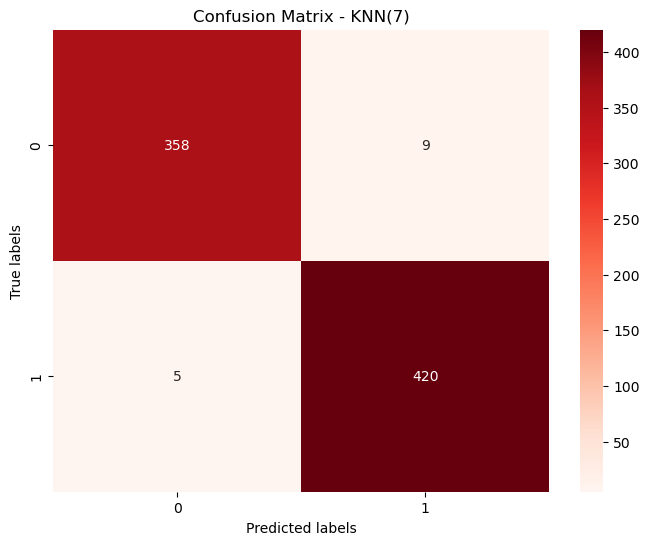

Classification Report:
              precision    recall  f1-score   support

           0     0.9862    0.9755    0.9808       367
           1     0.9790    0.9882    0.9836       425

    accuracy                         0.9823       792
   macro avg     0.9826    0.9819    0.9822       792
weighted avg     0.9824    0.9823    0.9823       792



In [163]:
plot_evaluation(voiceY_test, voice_pred_knn, method="KNN(7)")

### Support Vector Machine

In [164]:
svm_pipeline = make_pipeline(StandardScaler(), SVC())

# Fit the model
svm_pipeline.fit(voiceX_train, voiceY_train)

# Model Prediction
voice_pred_svm = svm_pipeline.predict(voiceX_test)
prf_svm = precision_recall_fscore_support(voiceY_test, voice_pred_svm, average='macro')

# Model Evaluation Methods
voice_score_svm = accuracy_score(voiceY_test, voice_pred_svm)
accuracy_results_svm = cross_val_score(svm_pipeline, voiceX_train, voiceY_train, cv=kfold).mean()
Precision_svm = prf_svm[0]
Recall_svm = prf_svm[1]
f1_svm = prf_svm[2]

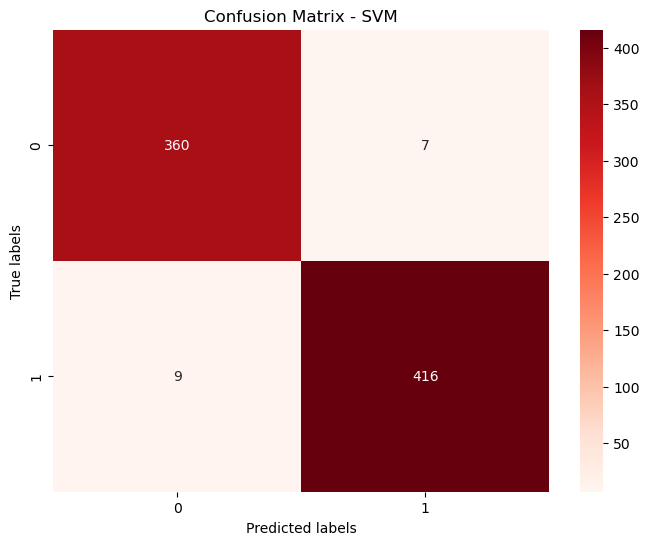

Classification Report:
              precision    recall  f1-score   support

           0     0.9756    0.9809    0.9783       367
           1     0.9835    0.9788    0.9811       425

    accuracy                         0.9798       792
   macro avg     0.9795    0.9799    0.9797       792
weighted avg     0.9798    0.9798    0.9798       792



In [165]:
plot_evaluation(voiceY_test, voice_pred_svm, method="SVM")

**After we calculated the different evaluation we plot the confution matrix**

### Random Forest

In [166]:
# Model Build
rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100)).fit(voiceX_train, voiceY_train)

# Model Prediction
voice_pred_rf = rf.predict(voiceX_test)
prf_rf = precision_recall_fscore_support(voiceY_test, voice_pred_rf, average='macro')

# Model Evaluation Methods
voice_score_rf = accuracy_score(voice_pred_rf, voiceY_test)
accuracy_results_rf = cross_val_score(rf, voiceX_train, voiceY_train, cv=kfold).mean()
Precision_rf = prf_rf[0]
Recall_rf = prf_rf[1]
f1_rf = prf_rf[2]

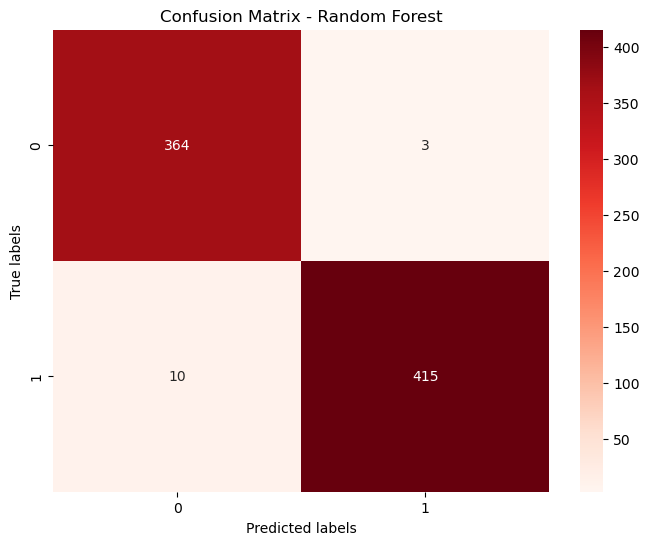

Classification Report:
              precision    recall  f1-score   support

           0     0.9733    0.9918    0.9825       367
           1     0.9928    0.9765    0.9846       425

    accuracy                         0.9836       792
   macro avg     0.9830    0.9841    0.9835       792
weighted avg     0.9838    0.9836    0.9836       792



In [167]:
plot_evaluation(voiceY_test, voice_pred_rf, method="Random Forest")

**After we calculated the different evaluation we plot the confution matrix**

**Also we can extract the importance of each feature according to the random forest classifier and plot it in a line chart**

In [170]:
def rf_feat_importance(m, df):
    if hasattr(m, 'steps'):
        m = m.steps[-1][1]  # Use the last step in the pipeline
    return pd.DataFrame({'cols': df.columns, 'Importance': m.feature_importances_}).sort_values('Importance', ascending=False)

rf_importance = rf_feat_importance(rf, df1)
rf_importance.head()


,cols,Importance
12,meanfun,0.362889
5,IQR,0.194885
3,Q25,0.135637
1,sd,0.095971
8,sp.ent,0.032519


<Axes: ylabel='cols'>

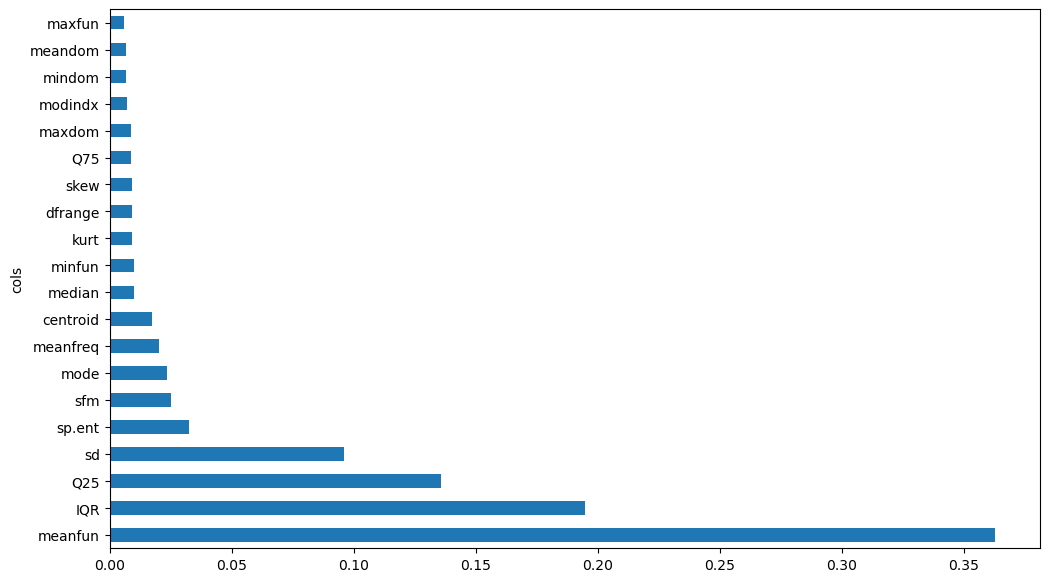

In [175]:

def plot_fi(fi):
    return fi.plot('cols', 'Importance', 'barh', figsize=(12,7), legend=False)
plot_fi(rf_importance)

**we find that the meanfun is the most important feature among all the features then comes IQR**

### GradientBoostingClassifier

In [179]:
gbc = make_pipeline(StandardScaler(), GradientBoostingClassifier()).fit(voiceX_train, voiceY_train)

# Model Prediction
voice_pred_gbc = gbc.predict(voiceX_test)
prf_gbc = precision_recall_fscore_support(voiceY_test, voice_pred_gbc, average='macro')

# Model Evaluation Methods
voice_score_gbc = accuracy_score(voice_pred_gbc, voiceY_test)
accuracy_results_gbc = cross_val_score(gbc, voiceX_train, voiceY_train, cv=kfold).mean()
Precision_gbc = prf_gbc[0]
Recall_gbc = prf_gbc[1]
f1_gbc = prf_gbc[2]

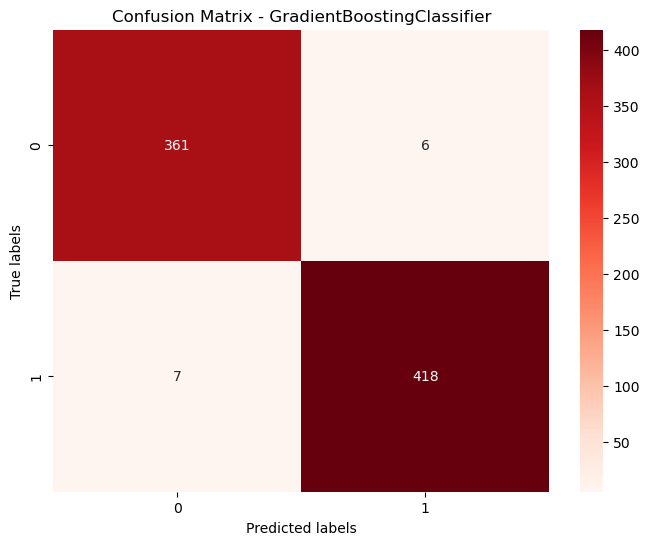

Classification Report:
              precision    recall  f1-score   support

           0     0.9810    0.9837    0.9823       367
           1     0.9858    0.9835    0.9847       425

    accuracy                         0.9836       792
   macro avg     0.9834    0.9836    0.9835       792
weighted avg     0.9836    0.9836    0.9836       792



In [180]:
plot_evaluation(voiceY_test, voice_pred_gbc, method="GradientBoostingClassifier")

### GridSearchCV

In [185]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# Define the parameter grid
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=kfold, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_rf.fit(voiceX_train, voiceY_train)

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

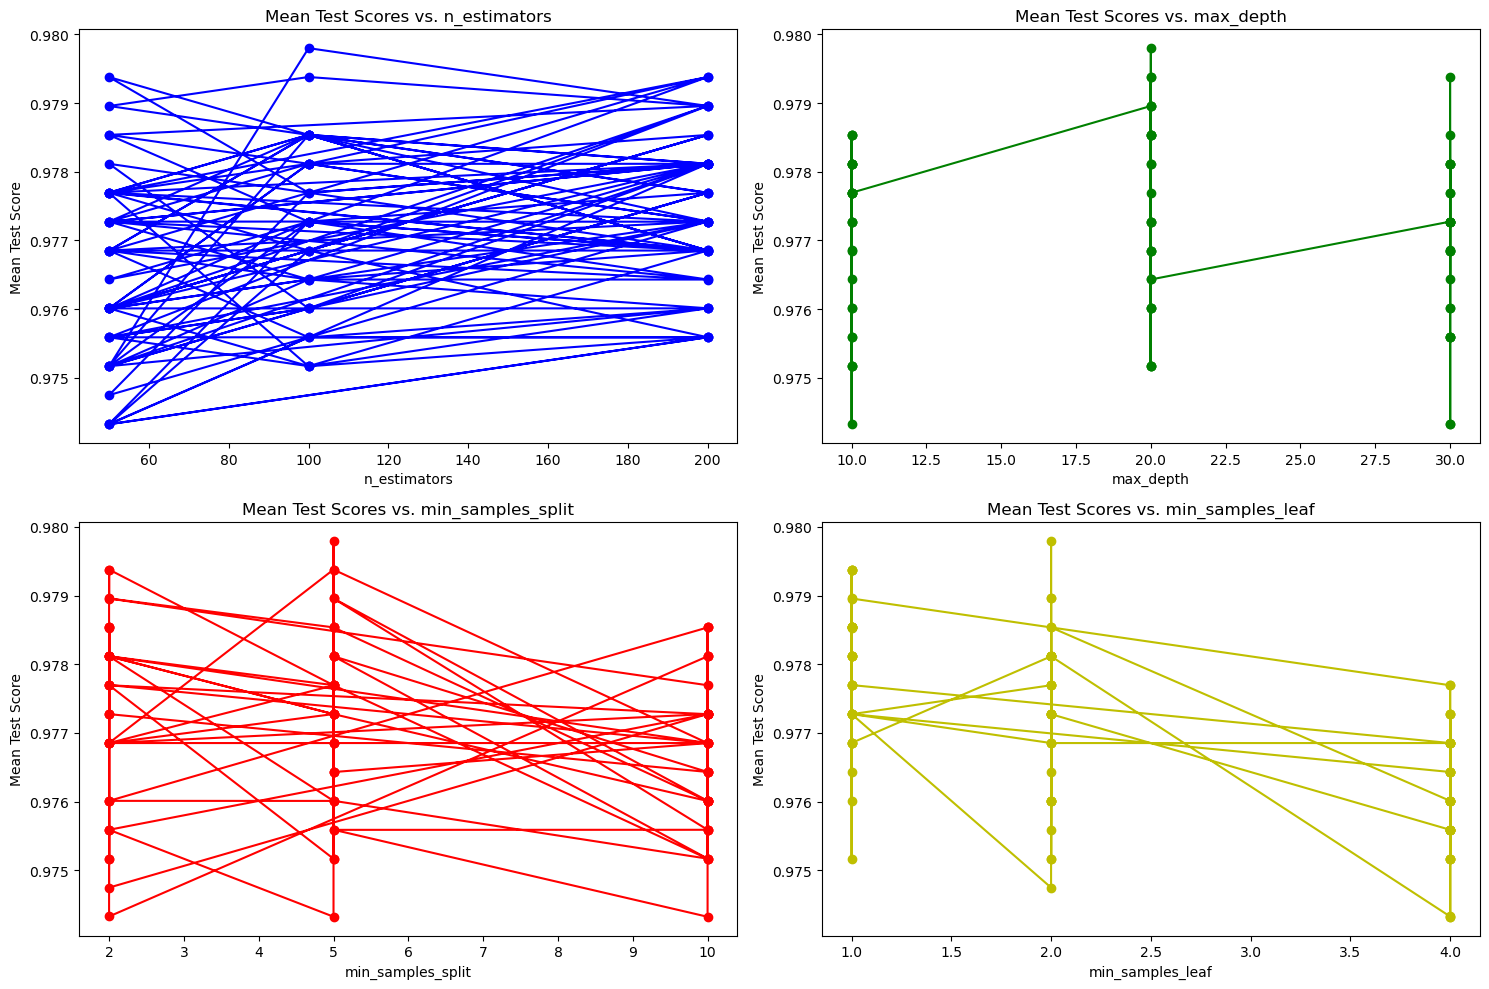

In [187]:
# Get the mean test scores and the corresponding parameters
mean_test_scores = grid_search_rf.cv_results_['mean_test_score']
params = grid_search_rf.cv_results_['params']

# Extract the hyperparameters for plotting
n_estimators = [param['rf__n_estimators'] for param in params]
max_depth = [param['rf__max_depth'] for param in params]
min_samples_split = [param['rf__min_samples_split'] for param in params]
min_samples_leaf = [param['rf__min_samples_leaf'] for param in params]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot mean test scores for n_estimators
axs[0, 0].plot(n_estimators, mean_test_scores, 'bo-')
axs[0, 0].set_title('Mean Test Scores vs. n_estimators')
axs[0, 0].set_xlabel('n_estimators')
axs[0, 0].set_ylabel('Mean Test Score')

# Plot mean test scores for max_depth
axs[0, 1].plot(max_depth, mean_test_scores, 'go-')
axs[0, 1].set_title('Mean Test Scores vs. max_depth')
axs[0, 1].set_xlabel('max_depth')
axs[0, 1].set_ylabel('Mean Test Score')

# Plot mean test scores for min_samples_split
axs[1, 0].plot(min_samples_split, mean_test_scores, 'ro-')
axs[1, 0].set_title('Mean Test Scores vs. min_samples_split')
axs[1, 0].set_xlabel('min_samples_split')
axs[1, 0].set_ylabel('Mean Test Score')

# Plot mean test scores for min_samples_leaf
axs[1, 1].plot(min_samples_leaf, mean_test_scores, 'yo-')
axs[1, 1].set_title('Mean Test Scores vs. min_samples_leaf')
axs[1, 1].set_xlabel('min_samples_leaf')
axs[1, 1].set_ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

In [189]:
grid_search_rf.best_score_
grid_search_rf.best_params_

{'rf__max_depth': 20,
 'rf__min_samples_leaf': 2,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 100}

## Learning Curves
here we plot the learning curves for all the models to give extra insight on the performance of the model

In [ ]:
knn_train_sizes, knn_train_scores, knn_valid_scores, *_ = learning_curve(knn, voiceX_train, voiceY_train, n_jobs=-1,
                                                        random_state=42, cv=3)

svm_train_sizes, svm_train_scores, svm_valid_scores, *_ = learning_curve(svm, voiceX_train, voiceY_train, n_jobs=-1,
                                                        random_state=42, cv=3)

rf_train_sizes, rf_train_scores, rf_valid_scores, *_ = learning_curve(rf, voiceX_train, voiceY_train, n_jobs=-1,
                                                        random_state=42, cv=3)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Learning Curve', fontsize=16)
# The Training Plots
sns.scatterplot(ax=axes[0], x= rf_train_sizes, y= rf_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= rf_train_sizes, y= rf_train_scores.mean(axis=1))
sns.scatterplot(ax=axes[0], x= svm_train_sizes, y= svm_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= svm_train_sizes, y= svm_train_scores.mean(axis=1))
sns.scatterplot(ax=axes[0], x= knn_train_sizes, y= knn_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= knn_train_sizes, y= knn_train_scores.mean(axis=1))
axes[0].set_title('Train')
axes[0].set_xlabel('Data size')
axes[0].set_ylabel('Score')
axes[0].legend(['RF', 'SVM', 'KNN'])

# The Validation Plots
sns.scatterplot(ax=axes[1], x= rf_train_sizes, y= rf_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= rf_train_sizes, y= rf_valid_scores.mean(axis=1))
sns.scatterplot(ax=axes[1], x= svm_train_sizes, y= svm_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= svm_train_sizes, y= svm_valid_scores.mean(axis=1))
sns.scatterplot(ax=axes[1], x= knn_train_sizes, y= knn_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= knn_train_sizes, y= knn_valid_scores.mean(axis=1))
axes[1].set_title('Valid')
axes[1].set_xlabel('Data size')
axes[1].set_ylabel('Score')
axes[1].legend(['RF', 'SVM', 'KNN'])
plt.show()

### Models' Performance Evaluation Table
the below table compares the applied models using different evaluation metrics which are: `model.score`,`Cross Validation`,  `Precision`, `Recall`, `F1 Score` in order to see which model is the **optimal** model for this dataset

In [ ]:
model_performance_table = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'RF'],
    'Model Score': [voice_score_svm, voice_score_knn, voice_score_rf],
    'Cross Validation': [accuracy_results_svm, accuracy_results_knn, accuracy_results_rf],
    'Valid Precision': [Precision_svm, Precision_knn, Precision_rf],
    'Valid Recall': [Recall_svm, Recall_knn, Recall_rf],
    'Valid F1 Score': [f1_svm, f1_knn, f1_rf]
})

model_performance_table.sort_values(by="Model Score", ascending=False)

Looking at the table above we find that the **Support Vectore Machine** Model achieved the best performance with accuracy of **98.1%** and the **Random Forest** Model comes the second with accuracy of **98%** which is only **0.1%** lower than the SVM.